In [2]:
import pandas as pd

# Load the provided dataset
file_path = '/Users/user/Downloads/Walmart.csv'
walmart_data = pd.read_csv(file_path)

# Display the first few rows of the dataset 
walmart_data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
import pandas as pd
import numpy as np
from datetime import datetime

# Step 1: Data Preprocessing

# Convert the 'Date' column into a datetime format
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])

# Check for missing values
missing_values = walmart_data.isnull().sum()

# Check for outliers in 'Weekly_Sales'
weekly_sales_describe = walmart_data['Weekly_Sales'].describe()

# Display the missing values and the descriptive statistics of 'Weekly_Sales'
missing_values, weekly_sales_describe


/Users/themacshop/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/themacshop/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/themacshop/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/themacshop/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

(Store           0
 Date            0
 Weekly_Sales    0
 Holiday_Flag    0
 Temperature     0
 Fuel_Price      0
 CPI             0
 Unemployment    0
 dtype: int64,
 count    6.435000e+03
 mean     1.046965e+06
 std      5.643666e+05
 min      2.099862e+05
 25%      5.533501e+05
 50%      9.607460e+05
 75%      1.420159e+06
 max      3.818686e+06
 Name: Weekly_Sales, dtype: float64)

In [4]:
# Step 2: Feature Engineering

# Extract week and month from the 'Date' column
walmart_data['Week'] = walmart_data['Date'].dt.isocalendar().week
walmart_data['Month'] = walmart_data['Date'].dt.month

# Create lagged features for 'Weekly_Sales'
# Assuming we want to use a lag of 1 week
walmart_data['Lagged_Weekly_Sales'] = walmart_data.groupby('Store')['Weekly_Sales'].shift(1)

# Fill the NaN values in the lagged column with the mean sales of the respective store
walmart_data['Lagged_Weekly_Sales'] = walmart_data.groupby('Store')['Lagged_Weekly_Sales'].transform(lambda x: x.fillna(x.mean()))

# Display the first few rows of the dataset after feature engineering
walmart_data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week,Month,Lagged_Weekly_Sales
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,17,5,1.555698e+06
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,48,12,1.643691e+06
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7,2,1.641957e+06
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,8,2,1.611968e+06
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,18,5,1.409728e+06


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 4: Model Development

# Preparing the dataset for model training
# Dropping rows with NaN values in 'Lagged_Weekly_Sales' (first row for each store)
model_data = walmart_data.dropna(subset=['Lagged_Weekly_Sales'])

# Selecting features and target variable
X = model_data[['Store', 'Week', 'Month', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Lagged_Weekly_Sales']]
y = model_data['Weekly_Sales']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using a Random Forest Regressor for the initial model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = random_forest_model.predict(X_test)

# Step 5: Model Evaluation

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse


/Users/themacshop/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(64615.2272059829, 100728.94790848238)

In [9]:
from sklearn.metrics import r2_score




r2 = r2_score(y_test, y_pred)

print(r2)


0.9684827853590101


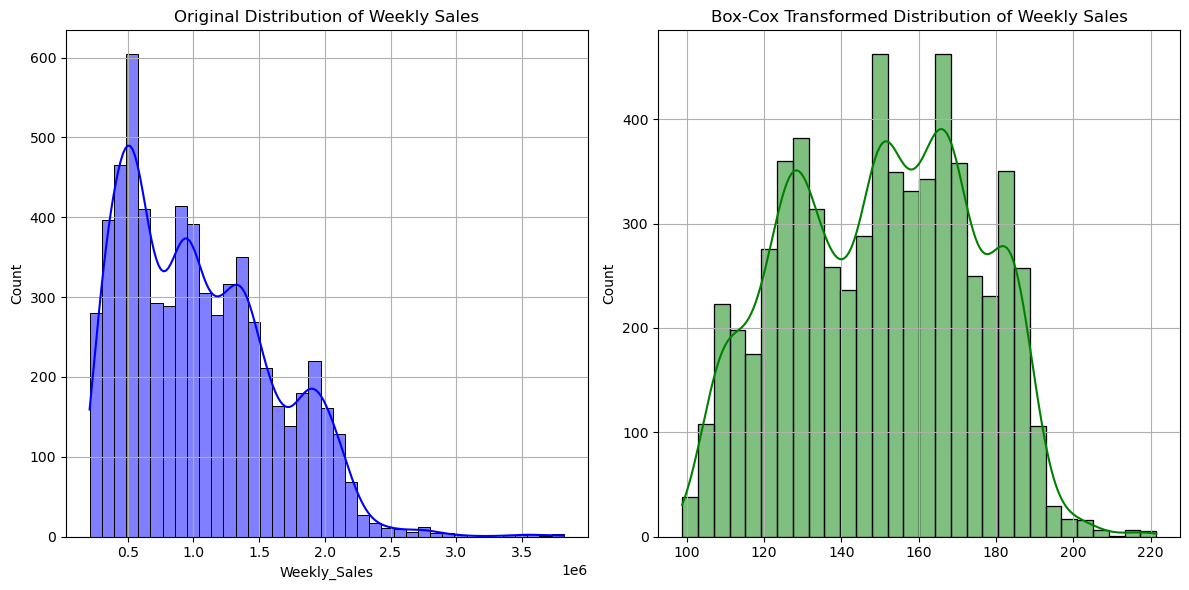

(1004720.6900201527, 1140318.3324063432)

In [6]:
from scipy import stats
from scipy.special import boxcox1p
import seaborn as sns
import matplotlib.pyplot as plt
# Analyzing the distribution of 'Weekly_Sales'
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.histplot(walmart_data['Weekly_Sales'], kde=True, color='blue')
plt.title('Original Distribution of Weekly Sales')
plt.grid()
# Applying Box-Cox transformation (adding a small constant to avoid zero values)
# The Box-Cox transformation requires positive values, hence adding a small constant
weekly_sales_transformed, _ = stats.boxcox(walmart_data['Weekly_Sales'] + 1) 

plt.subplot(1, 2, 2)
sns.histplot(weekly_sales_transformed, kde=True, color='green')
plt.title('Box-Cox Transformed Distribution of Weekly Sales')

plt.tight_layout()
plt.grid()
plt.show()

# Update the model data with the transformed 'Weekly_Sales'
model_data_transformed = model_data.copy()
model_data_transformed['Weekly_Sales'] = weekly_sales_transformed

# Redefine the target variable with the transformed data
y_transformed = model_data_transformed['Weekly_Sales']

# Splitting the transformed data into training and testing sets
X_train_transformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(
    X, y_transformed, test_size=0.2, random_state=42)

# Retraining the Random Forest model with the transformed data
random_forest_model.fit(X_train_transformed, y_train_transformed)

# Predicting on the transformed test set
y_pred_transformed = random_forest_model.predict(X_test_transformed)

# Reversing the Box-Cox transformation for evaluation
y_pred_transformed_reversed = np.expm1(stats.boxcox(y_pred_transformed, _))

# Evaluating the model with the transformed data
mae_transformed = mean_absolute_error(y_test, y_pred_transformed_reversed)
rmse_transformed = np.sqrt(mean_squared_error(y_test, y_pred_transformed_reversed))

mae_transformed, rmse_transformed


In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preparing data for customer segmentation
# For simplicity, let's create a few hypothetical features that represent customer behaviors
# These features could include: total sales per store, average weekly sales, and holiday sales

# Aggregating data to create features
segmentation_data = walmart_data.groupby('Store').agg(
    total_sales=('Weekly_Sales', 'sum'),
    avg_weekly_sales=('Weekly_Sales', 'mean'),
    holiday_sales=('Weekly_Sales', lambda x: x[walmart_data.loc[x.index, 'Holiday_Flag'] == 1].mean())
).fillna(0)

# Standardizing the data - important for K-Means
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

# Performing K-Means clustering
# Choosing a number of clusters (e.g., 5) for demonstration purposes
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(segmentation_data_scaled)

# Assigning cluster labels to the data
segmentation_data['Cluster'] = kmeans.labels_

# Displaying the first few rows of the segmented data
segmentation_data.head()


,total_sales,avg_weekly_sales,holiday_sales,Cluster
Store,,,,
1,2.224028e+08,1.555264e+06,1665747.656,0
2,2.753824e+08,1.925751e+06,2079266.900,2
3,5.758674e+07,4.027044e+05,437811.050,4
4,2.995440e+08,2.094713e+06,2243102.624,2
5,4.547569e+07,3.180118e+05,359501.607,4


<Figure size 1000x600 with 0 Axes>

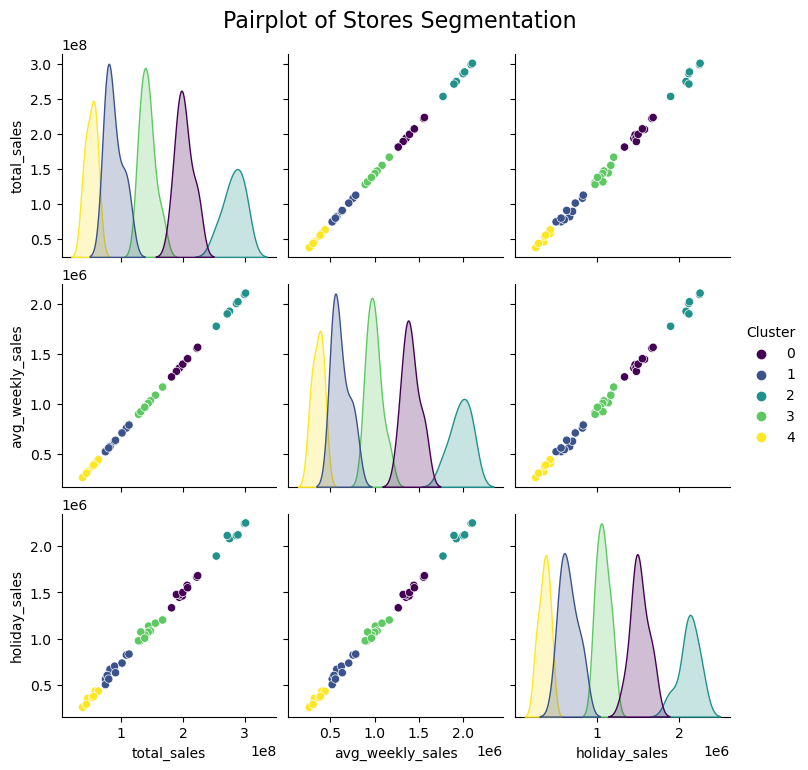

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the clusters
plt.figure(figsize=(10, 6))

# Plotting each pair of features in the dataset
sns.pairplot(segmentation_data, hue='Cluster', palette='viridis', diag_kind='kde')

# Setting the title
plt.suptitle('Pairplot of Stores Segmentation', fontsize=16, y=1.02)

# Displaying the plot
plt.show()
